In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
vesit_df = pd.read_csv('vesit.csv')
analyzer = SentimentIntensityAnalyzer()

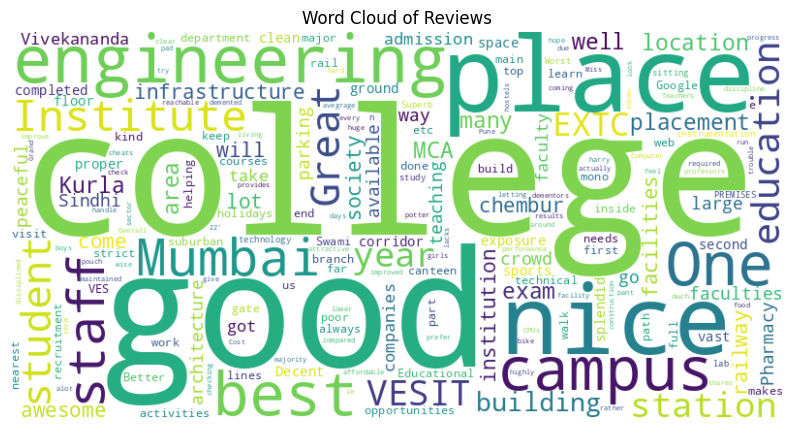

In [ ]:
reviews_text = ' '.join(str(review) for review in vesit_df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

In [ ]:
scores = []
positive_list = []
negative_list = []
neutral_list = []

for review in vesit_df['review']:
    review = str(review)
    pos = analyzer.polarity_scores(review)["pos"]
    neu = analyzer.polarity_scores(review)["neu"]
    neg = analyzer.polarity_scores(review)["neg"]

    scores.append({ "Positive": pos,
                    "Negative": neg,
                    "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
vesit_df = vesit_df.join(sentiments_score)

In [ ]:
def max_of_three(a, b, c):
    if a >= b and a >= c:
        return 'Positive'
    elif b > a and b >= c:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
labels = []
for index, row in vesit_df.iterrows():
  max_val = max_of_three(row['Positive'], row['Negative'], row['Neutral'])
  labels.append(max_val)

vesit_df['label'] = labels

In [ ]:
vesit_df

,name,rsqaWe,review,Positive,Negative,Neutral,label
0,yusuf kulkarni,6 months ago,I've completed my BE in EXTC in 22'. Placement...,0.202,0.027,0.771,Neutral
1,Alok Sharma,2 weeks ago,Very nice place it's peaceful. It have good in...,0.496,0.000,0.504,Neutral
2,Nikita kumawat,10 months ago,One of the best engineering colleges in Mumbai...,0.297,0.027,0.676,Neutral
3,Prasad,a year ago,College is also known as VESIT. it shares cam...,0.066,0.000,0.934,Neutral
4,Rohan Pol,5 years ago,Very nice place it's peaceful. It have good in...,0.496,0.000,0.504,Neutral
...,...,...,...,...,...,...,...
93,rakesh shirodkar,3 years ago,Nice campus,0.737,0.000,0.263,Positive
94,Suchit Jagiasi,6 months ago,What can be done less than one?,0.000,0.000,1.000,Neutral
95,sushil Telang,a year ago,Swami Vivekananda College Chembur is a very go...,0.262,0.000,0.738,Neutral
96,Vinod Dry fruits and spices “Vinod Dry fruits”...,a year ago,very beautiful,0.807,0.000,0.193,Positive


In [ ]:
vesit_df.drop(columns=['Positive', 'Negative', 'Neutral'], inplace=True)

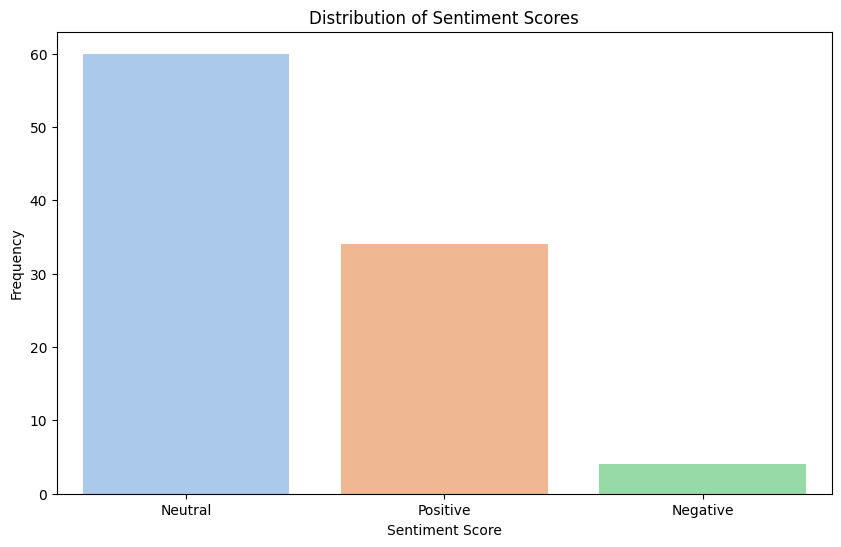

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))
sns.countplot(vesit_df, x='label', hue='label', palette='pastel', dodge=False)
plt.legend().set_visible(False)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
positive_reviews = ' '.join(vesit_df[vesit_df['label'] == 'Positive']['review'].values)
negative_reviews = ' '.join(vesit_df[vesit_df['label'] == 'Negative']['review'].values)
neutral_reviews = ' '.join(vesit_df[vesit_df['label'] == 'Neutral']['review'].values)

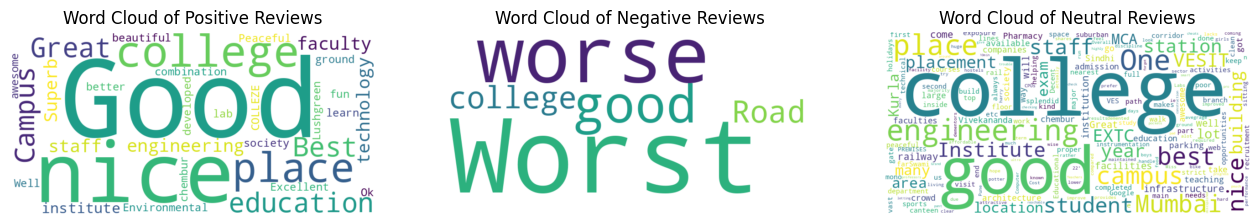

In [ ]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Reviews')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud of Neutral Reviews')
plt.axis('off')

plt.show()